<a href="https://colab.research.google.com/github/pathakadithi/CyberSentinel_IBM_Hackathon/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd

# Full path to your Excel file in Drive
file_path = '/content/drive/MyDrive/data.csv'

# Read Excel file
df = pd.read_csv('/content/drive/MyDrive/data.csv')

# Inspect the data
print(df.head())
print(df.columns)
print(df.shape)

df.head()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data        # Features
y = data.target      # Labels (0 = malignant, 1 = benign)

# Quick look at the data
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of X: (569, 30)
Shape of y: (569,)


In [23]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized training features shape:", X_train_scaled.shape)


Standardized training features shape: (455, 30)


In [24]:
# Initialize and fit logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict probabilities
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (benign)

# Predict class labels (default threshold=0.5)
y_pred = logreg.predict(X_test_scaled)


Confusion Matrix:
 [[41  1]
 [ 1 71]]
Precision: 0.9861111111111112
Recall: 0.9861111111111112
ROC-AUC: 0.9953703703703703


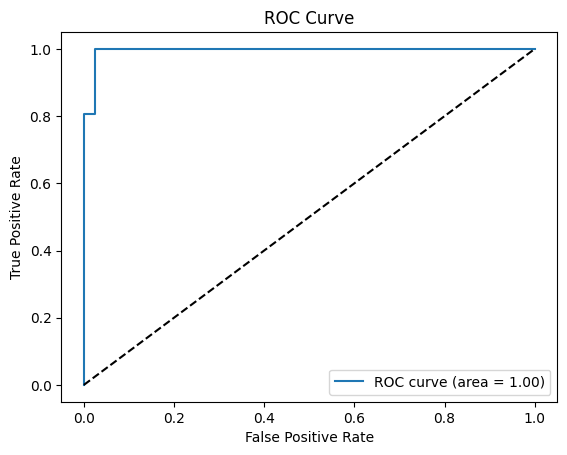

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

# Optional: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [26]:
# Example: set threshold to 0.3 (more sensitive to positives)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# Evaluate new predictions
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
precision_thresh = precision_score(y_test, y_pred_thresh)
recall_thresh = recall_score(y_test, y_pred_thresh)
print(f"Threshold={threshold}")
print("Confusion Matrix:\n", cm_thresh)
print("Precision:", precision_thresh)
print("Recall:", recall_thresh)


Threshold=0.3
Confusion Matrix:
 [[40  2]
 [ 0 72]]
Precision: 0.972972972972973
Recall: 1.0


In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example
z = np.array([-2, 0, 2])
print("Sigmoid outputs:", sigmoid(z))


Sigmoid outputs: [0.11920292 0.5        0.88079708]
